In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [36]:
trip=pd.read_csv('trip101.csv')

In [37]:
trip.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [38]:
trip['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

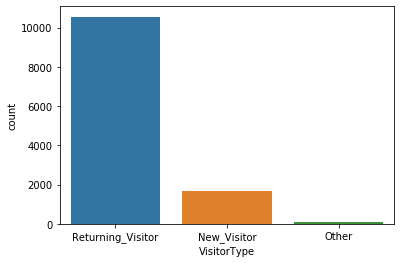

In [39]:
sns.countplot(trip['VisitorType'])

We can see that a large majority of the people who visit the webpages are returning customers/visitors

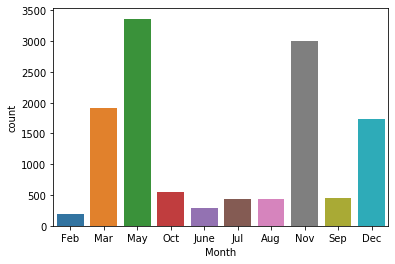

In [40]:
sns.countplot(trip['Month'])

We can seee that a large number of visits are during the months of March,May,November and December which might suggest that these are the holiday seasons where most people are likely to go or start planning on trips

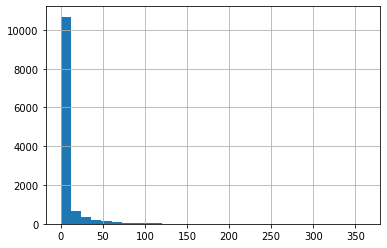

In [10]:
(trip['PageValues']).hist(bins=30)

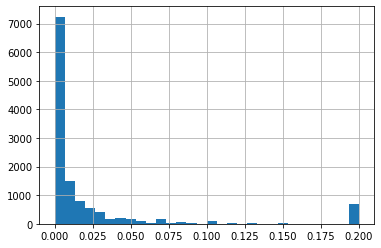

In [11]:
(trip['BounceRates']).hist(bins=30)

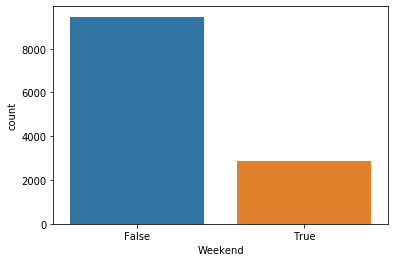

In [12]:
sns.countplot(trip['Weekend'])

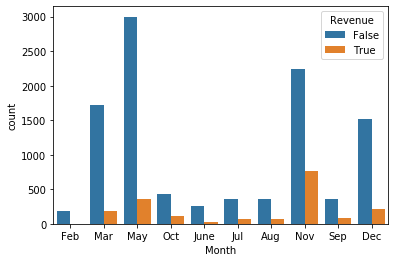

In [43]:
sns.countplot(trip['Month'],hue=trip['Revenue'])

As mentioned before, since the holiday season is likely to be in the months of March, May, November and December, that is where we see the most amount of activity whether it generates revenue or not

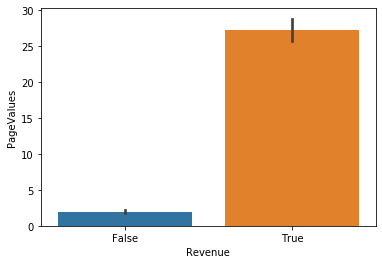

In [44]:
sns.barplot(x='Revenue',y='PageValues',data=trip)

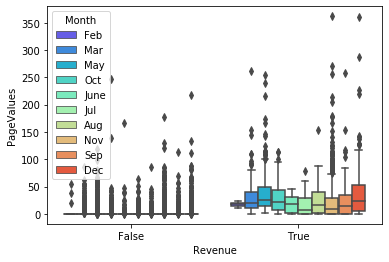

In [45]:
sns.boxplot(x="Revenue", y="PageValues", data=trip,palette='rainbow',hue='Month')

In [46]:
trip.dropna(inplace=True)#removing the NA rows for ease of operations. There are 14 NA rows in total

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()#Scaling all the values

In [49]:
scaler.fit(trip.drop(['Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'
                      ,'ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType',
                      'VisitorType','Weekend','Revenue'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scaled_features = scaler.transform(trip.drop(['Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'
                      ,'ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType',
                      'VisitorType','Weekend','Revenue'],axis=1))

In [51]:
df_feat = pd.DataFrame(scaled_features,columns=['Administrative Duration','Bounce Rates'])
df_feat.head()

,Administrative Duration,Bounce Rates
0,-0.457476,3.672627
1,-0.457476,-0.457458
2,-0.463131,3.672627
3,-0.457476,0.575063
4,-0.457476,-0.044449


In [52]:
from sklearn.model_selection import train_test_split#splitting into test data and training data

In [53]:
rev=pd.get_dummies(trip['Revenue'],drop_first=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,rev[True],
                                                    test_size=0.30,random_state=101)

In [55]:
from sklearn.neighbors import KNeighborsClassifier#importing KNN methods

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

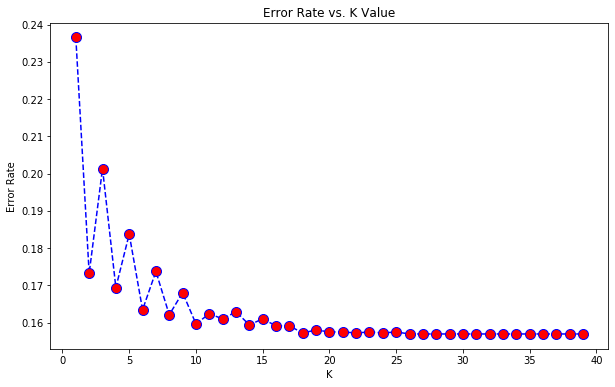

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

This graph suggets that the best cluster for Administrative Duration vs Bounce Rates is when forming a cluster of k=16. This value of K will give you the lowest error rate

In [67]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=16')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=16


[[3105   10]
 [ 578    2]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3115
           1       0.17      0.00      0.01       580

    accuracy                           0.84      3695
   macro avg       0.50      0.50      0.46      3695
weighted avg       0.74      0.84      0.77      3695



In [69]:
######################################################################

For the 2nd question, I have used 2 methods just to see what results it gives. In the first I have not split the data into a test or training data because there are very less number of observations and each observation occurs only once. Thus I have just fitted all 10 observations to form a regression equation. I have taken the Position and Difficulty as the input and points as Output. Since the two input variables are categorical, I had to convert them to dummy variables in order for them to be used after which they were used for the regression.

In the 2nd method I have just tried to dabble by splitting the data, but after seeing the results it clearly shows a large amount of error. Hence for this data I feel we cannot split it unless we have a lot more observations.

In [5]:
level=pd.read_csv('Level and Points.csv')

In [6]:
level

,Position,Difficulty-Level,Points
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1500000


In [14]:
pos=pd.get_dummies(level['Position'],drop_first=True)
dif=pd.get_dummies(level['Difficulty-Level'],drop_first=True)
df=pd.concat([pos,dif],axis=1)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [15]:
lm.fit(df,level['Points'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(lm.intercept_)

45000.00000000003


In [70]:
coeff_df = pd.DataFrame(lm.coef_,df.columns,columns=['Coefficient'])
coeff_df

,Coefficient
C-level,227500.0
CEO,727500.0
Country Manager,32500.0
Junior Consultant,2500.0
Manager,17500.0
Partner,77500.0
Region Manager,52500.0
Senior Consultant,7500.0
Senior Partner,127500.0
2,2500.0


In [71]:
#2nd METHOD

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, level['Points'], test_size=0.2, random_state=101)

In [22]:
lm1 = LinearRegression()

In [23]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lm1.intercept_)

44999.99999999994


In [25]:
coeff_df = pd.DataFrame(lm1.coef_,df.columns,columns=['Coefficient'])
coeff_df

,Coefficient
C-level,-1.164153e-10
CEO,7.275000e+05
Country Manager,3.250000e+04
Junior Consultant,2.500000e+03
Manager,1.750000e+04
Partner,7.750000e+04
Region Manager,5.250000e+04
Senior Consultant,0.000000e+00
Senior Partner,1.275000e+05
2,2.500000e+03


In [30]:
predictions = lm1.predict(X_test)

In [31]:
y_test

8    500000
2     60000
Name: Points, dtype: int64

In [27]:
predictions

array([45000., 45000.])

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 235000.00000000012
MSE: 103625000000.00008
RMSE: 321908.37205639755
